Adaptive RAG Cohere Command R

Adaptive RAG is a strategy for RAG that unites (1) query analysis with (2) active / self-corrective RAG.

In the paper, they report query analysis to route across:

No Retrieval (LLM answers)
Single-shot RAG
Iterative RAG
Let's build on this to perform query analysis to route across some more interesting cases:

No Retrieval (LLM answers)
Web-search
Iterative RAG
We'll use Command R, a recent release from Cohere that:

Has strong accuracy on RAG and Tool Use
Has 128k context
Has low latency

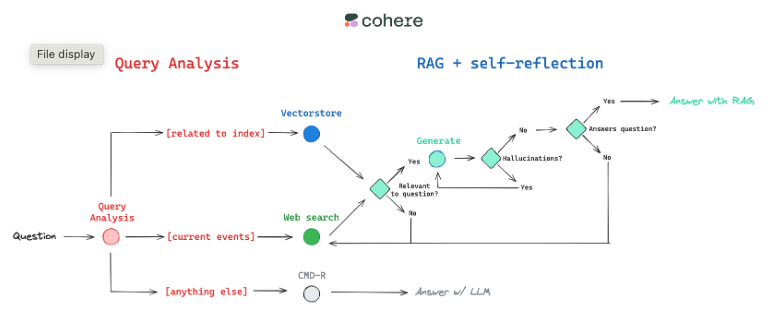

In [4]:
pip install langchain_cohere

     |████████████████████████████████| 44 kB 719 kB/s eta 0:00:01
     |████████████████████████████████| 209 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 251 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 91.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 225 kB/s eta 0:00:0101
     |████████████████████████████████| 346 kB 69.4 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 450 kB 84.7 MB/s eta 0:00:01
     |████████████████████████████████| 183 kB 9.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/kevinluo/Library/Mobile Documents/com~apple~CloudDocs/專給macbook用/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_cohere import CohereEmbeddings
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma

# Set embeddings
embd = CohereEmbeddings()

# Docs to index
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

# Load
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# Split
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=512, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs_list)

# Add to vectorstore
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    embedding=embd,
)

retriever = vectorstore.as_retriever()


/Users/kevinluo/Library/Mobile Documents/com~apple~CloudDocs/專給macbook用/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


ModuleNotFoundError: No module named 'langchain_cohere'